<IPython.core.display.Javascript object>


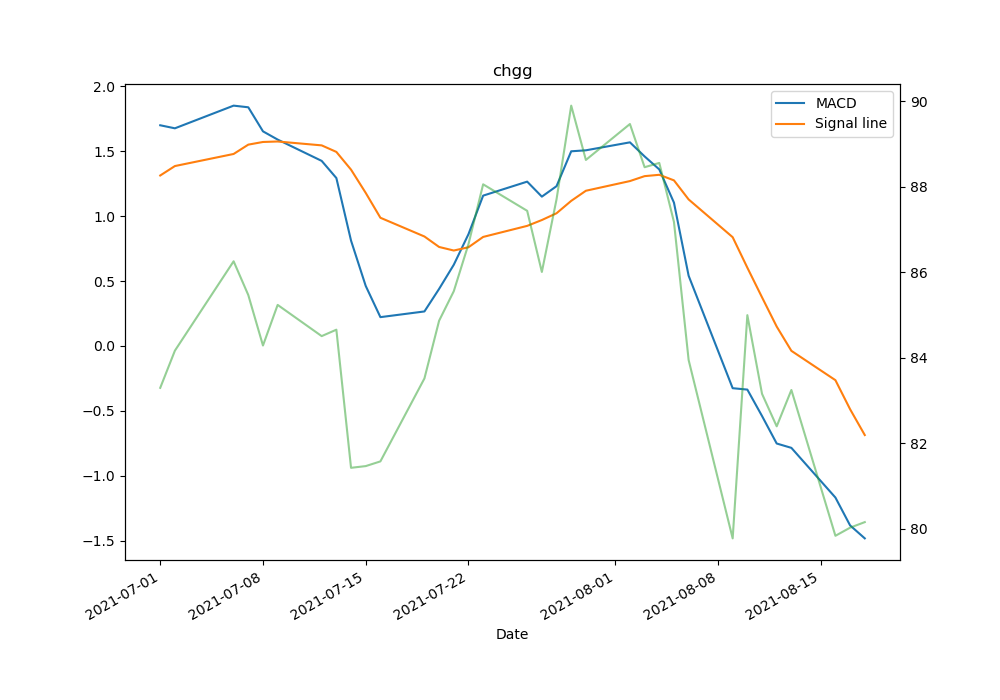

<AxesSubplot:label='5d2e6e2d-f03a-4e13-a342-fee002c1f910'>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
%matplotlib notebook

start = dt.datetime(2021, 1, 1)
tick = "chgg"
ticker = pdr.get_data_yahoo(tick, start)

exp1 = ticker['Close'].ewm(span=8, adjust=False).mean()
exp2 = ticker['Close'].ewm(span=17, adjust=False).mean()
ticker['MACD'] = exp1 - exp2
ticker['Signal line'] = ticker['MACD'].ewm(span=9, adjust=False).mean()

ticker.tail()

fig, ax = plt.subplots(figsize=(10,7))
ticker[['MACD', 'Signal line']].loc['2021-07-01':].plot(ax=ax, title = tick)
ticker['Close'].loc['2021-07-01':].plot(ax=ax, secondary_y=True, alpha=0.5)